In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the Data

### load training data with labels

In [4]:
letter_name = 'letter_idx'
feature_names = [f"p_{i}" for i in range(784)]

X_train_df = pd.read_csv('data/emnist-letters-train.csv', header=None,
                     names=[letter_name] + feature_names)
X_train = X_train_df[feature_names].to_numpy()[:71040]
y_train = X_train_df[letter_name].to_numpy()[:71040]

X_val = X_train_df[feature_names].to_numpy()[71040:]
y_val = X_train_df[letter_name].to_numpy()[71040:]


In [5]:
71040 / len(X_train_df)

0.8

### load testing data without labels 

In [7]:
X_test_df = pd.read_csv('data/features-test.csv')
X_test = X_test_df[feature_names].to_numpy()

# Map between characters and integer labels

In [8]:
def char_position(letter):
    return ord(letter) - 97

def pos_to_char(pos):
    return chr(pos + 97)

# Visualize the Data

In [9]:
def disp_image(img_arr, str_idx):
    plt.imshow(img_arr.reshape(28, 28).T)
    plt.title(pos_to_char(str_idx - 1))
    plt.show()

In [10]:
print((X_train[0]))

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0  20 114 125  82
  37  37  39 115 157  94  21  10  32  37  37  37  37  37  37  37  82 125
 114  20   0   0   0   3 109 245 249 233 217 217 217 245 251 234 172 142
 203 217 217 217 217 217 217 217 233 249 245 109   3   0   0   4 114 253
 254 254 254 254 254 254 254 254 252 251 254 254 254 254 254 254 254 254
 254 254 254 127   4   0   0   0  45 214 233 251 254 254 254 254 255 255
 255 255 255 255 255 255 255 255 255 255 254 254 251 113   4   0   0   0
   0   5  22  82 128 160 184 217 217 218 249 254 255 255 255 255 255 254
 254 247 216 170  83   7   0   0   0   0   0   0   0   2   5  16  25  37
  40  50 227 254 255 255 254 254 252 245 220 159  3

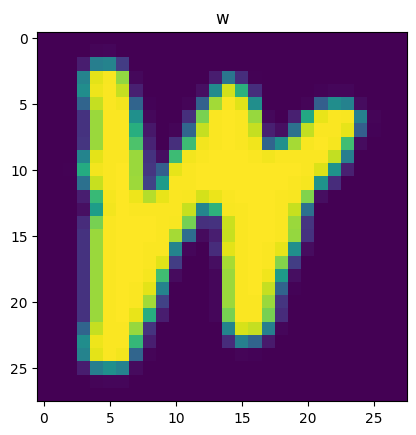

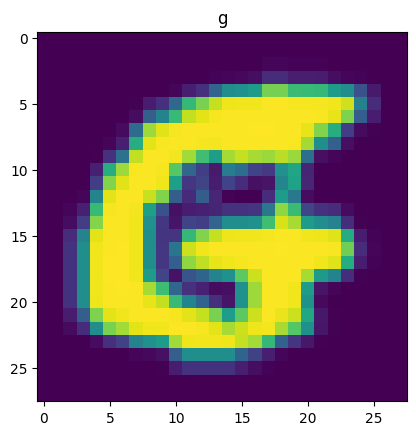

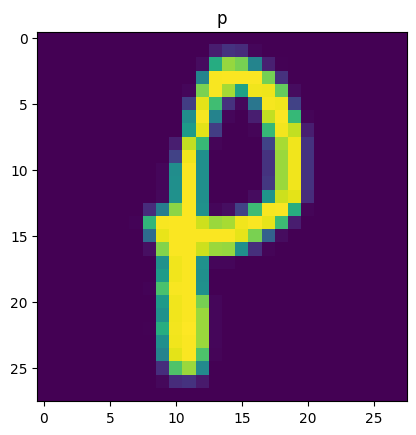

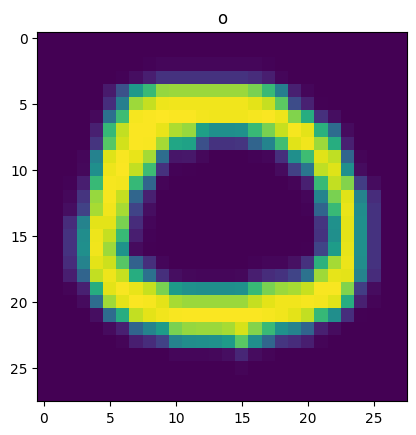

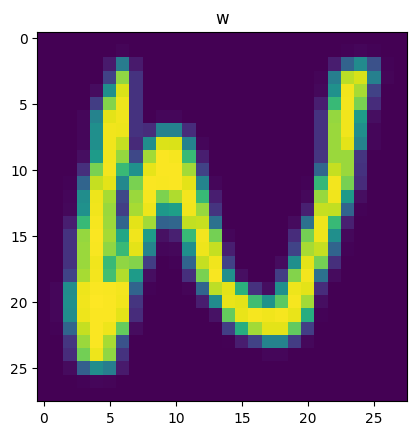

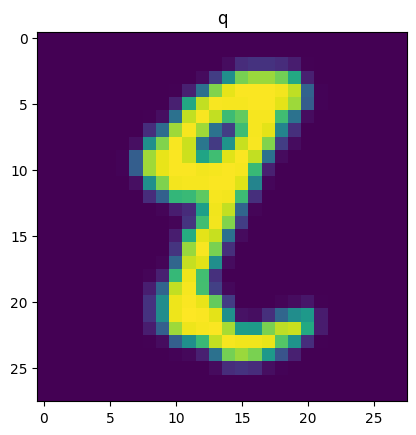

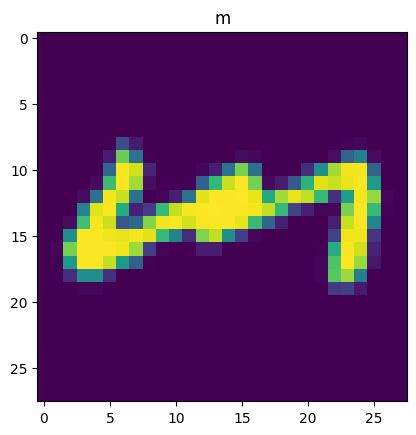

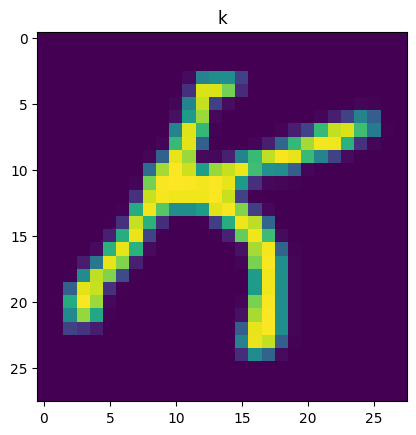

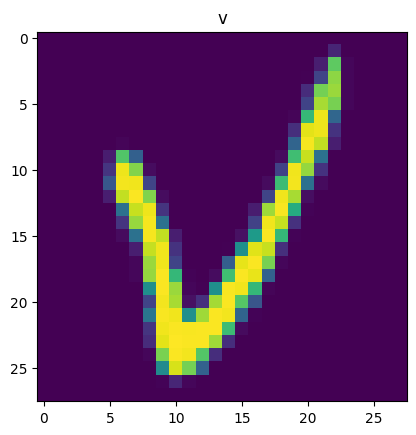

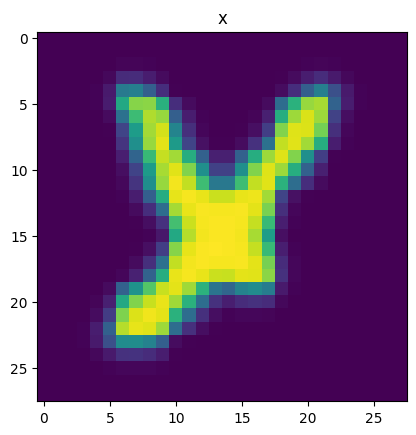

In [11]:
for i in range(10):
    disp_image(X_train[i], y_train[i])

In [12]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=158)

pca.fit(X_train)

transformed_data = pd.DataFrame(pca.transform(X_train),columns=["Component"+str(i) for i in range(158)])

print(sum(pca.explained_variance_ratio_))


0.9701272971819177


In [13]:

ratio_pca = np.cumsum(pca.explained_variance_ratio_)
print(np.where(ratio_pca>0.97))



(array([157]),)


# Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [16]:
clf = LogisticRegression(random_state=0, penalty=None, max_iter=100000).fit(X_train, y_train)
train_preds = clf.predict(X_train)
val_preds = clf.predict(X_val)

letters = [pos_to_char(x) for x in range(26)]

print(classification_report(y_train, train_preds, target_names=letters))

print(classification_report(y_val, val_preds, target_names=letters))


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           a       0.63      0.62      0.62      2696
           b       0.78      0.79      0.78      2730
           c       0.84      0.86      0.85      2707
           d       0.72      0.71      0.72      2755
           e       0.83      0.79      0.81      2742
           f       0.78      0.80      0.79      2714
           g       0.64      0.57      0.60      2708
           h       0.72      0.73      0.73      2752
           i       0.62      0.64      0.63      2730
           j       0.80      0.83      0.81      2752
           k       0.74      0.74      0.74      2716
           l       0.61      0.62      0.62      2737
           m       0.88      0.92      0.90      2734
           n       0.71      0.70      0.70      2689
           o       0.84      0.89      0.87      2764
           p       0.82      0.88      0.85      2743
           q       0.67      0.67      0.67      2722
           r       0.72    

In [17]:
clf = LogisticRegression(random_state=0, penalty='l1',max_iter=100000).fit(transformed_data, y_train)
train_preds = clf.predict(transformed_data)

val_preds = clf.predict(pca.transform(X_val))

letters = [pos_to_char(x) for x in range(26)]

print(classification_report(y_train, train_preds, target_names=letters))

print(classification_report(y_val, val_preds, target_names=letters))


ValueError: Solver lbfgs supports only 'l2' or None penalties, got l1 penalty.

# Predict on test data-set and save predictions

In [ ]:
test_preds = clf.predict(pca.transform(X_test))
pred_df = pd.DataFrame(test_preds, columns=['letter_idx'], index=X_test_df.index)
pred_df.to_csv("data/logistic_baseline.csv", index_label='sample-id')